In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
VaynerData = pd.DataFrame.from_csv('Analyst_Candidate_Dataset_cvgardner.xlsx - Facebook Data.csv')
site_data = pd.DataFrame.from_csv('Analyst_Candidate_Dataset_cvgardner.xlsx - Site Data.csv')
writer = pd.ExcelWriter('Analyst_Candidate_Dataset_cvgardner_Final.xlsx') #create a writer to output to the final excel file

In [92]:
VaynerData.head()

,Placement ID,Date,Campaign,Audience,Excluded Audience,Audience Type,Creative,Post Type,Gender,Optimization Event,...,Video Views to 50%,Video Views to 75%,Video Views to 95%,Video Views to 100%,CPM,CTR,CPC,Work,CTM Confirm,CPC Confirm
AD ID,,,,,,,,,,,,,,,,,,,,,
1000281165,2000200268,1-Feb,Evergreen,Shopping Cart Page,Purchases,Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,NaN,NaN,19.72,0.015345,1.27,NaN,15.26,15.26
1000141830,2000200714,1-Feb,Evergreen,Product Page,"Purchasers, Shopping Cart",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,NaN,NaN,16.74,0.012474,1.33,NaN,49.12,49.12
1000659879,2000200882,1-Feb,Evergreen,Home Page,"Product Page, Shopping Cart, Purchasers",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,NaN,NaN,13.16,0.010494,1.25,NaN,81.37,81.37
1000599036,2000201316,1-Feb,Evergreen,Top Purchasers Lookalike 1%,All Site Visitors,Lookalike,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,NaN,NaN,11.92,0.008910,1.36,NaN,32.65,32.65
1000512589,2000202452,1-Feb,Evergreen,Top Purchasers Lookalike 2%,All Site Visitors,Lookalike,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,NaN,NaN,10.81,0.008712,1.24,NaN,14.86,14.86


**Explanation:**

Since I do not have access to Excel I had attempted a few of the problems using Google Sheets since it is similar to Excel however I am not familiar with the commands used to parse through Excel/Google Sheets quickly. Instead I've decided to tackle this takehome challenge using Python and a few useful models like Numpy and Pandas. I have also decided to use this method because should I be accepted for the position this is how I would intend to process and analyze data on the job and if I am disqualified for not using Excel that is fine. Please continue scrolling to find all my answers and work.
    
To tackle the take home challenge in Python I've changed some of the columns that were in currency and percentage values (CPM, CTR and CPC) into pure numerical values and saved it as a Comma-separated values (.csv) file. This is because I won't have to do string parsing to convert them into int values manually. My brief analysis in Google Sheets showed me that the CPM and CPC columns are the same as (Media Spend)/(The relevant feature). Since Media Spend is not based on some algorithm similar to (# of clicks)*(CPC) + (# of impressions)*(CPM)/1000 I will assume that any questions that ask me to calculate a similar value will follow the same formula.

Once I have completed the take home challenge and answered the questions here I will export the final DataFrame back into an Excel file to submit along with this report and a link to it on my github incase you do not have Jupyter Notebooks installed on your computer.

**Question 1**

What is the total spend for each campaign

A: Seen below I first confirm that there are no missing values in the Campaign column and see there are three different campaigns Evergreen, Valentine's Day Gift Offer and Free Shipping. Then I do a groupby call using Campaing which essentially breaks up the dataframe by the different campaign values. After that I restrict the groupby to the Media Spend column and call sum which gives me the sum of all the values in the Media Spend column for each distinct value in the Campaign column. 

Total Spend for each campaign

        - Evergreen = $113244.01
    - Free Shipping = $22750.46
        - Valentine's Day = $52372.40

In [33]:
VaynerData.Campaign.unique() 

array(['Evergreen', "Valentine's Day Gift Offer", 'Free Shipping'], dtype=object)

In [47]:
VaynerData.groupby('Campaign')['Media Spend'].sum()

Campaign
Evergreen                     113244.01
Free Shipping                  22750.46
Valentine's Day Gift Offer     52372.40
Name: Media Spend, dtype: float64

**Question 2**

Which was the Cost Per Video View and Cost Per Completion for each Creative? (Please Filter by Video Post Type)

A: Like before I want to confirm that there are not missing data types in the Creative column, but this time I also add columns for CPV and CPCompletion by dividing the Media Spend by the relevant column. Then exclude all the non-Video Posty Types and look at the first 3 rows to quickly sanity check my CPV and CPCompletion calculations. After that I used a groupby and mean this time instead of sum. This gives us the following results with CPV and CPCompletion in Dollar Values.

Creative | CPV | CPCompletion
--- | --- | ---
Brand Logo + Free Shipping CTA | 0.0569 | 0.422
Brand Logo + Generic CTA | 0.0387 | 0.287
Brand Logo + Save Now CTA | 0.0386 | 0.289
Brand Logo + Valentine's Day CTA | 0.0403 | 0.296
Free Shipping + Free Shipping CTA | 0.0595 | 0.453  
Valentine's Day + Generic CTA | 0.0409 | 0.308
Valentine's Day + Valentine's Day CTA | 0.0649 | 0.432




In [54]:
VaynerData['CPV'] = VaynerData['Media Spend']/VaynerData['Video Views']
VaynerData['CPCompletion'] = VaynerData['Media Spend']/VaynerData['Video Views to 95%']
VaynerData['Creative'].unique()

array(['Brand Logo + Generic CTA', 'Brand Logo + Save Now CTA',
       "Brand Logo + Valentine's Day Messaging CTA",
       "Valentine's Day + Generic CTA",
       "Valentine's Day + Valentine's Day CTA",
       'Free Shipping + Free Shipping CTA',
       'Brand Logo + Free Shipping CTA'], dtype=object)

In [70]:
VaynerData[VaynerData['Post Type']=='Video'].head(3)

,Placement ID,Date,Campaign,Audience,Excluded Audience,Audience Type,Creative,Post Type,Gender,Optimization Event,...,Video Views to 95%,Video Views to 100%,CPM,CTR,CPC,Work,CTM Confirm,CPC Confirm,CPV,CPCompletion
AD ID,,,,,,,,,,,,,,,,,,,,,
1000688749,2000207076,1-Feb,Evergreen,Shopping Cart Page,Purchases,Website Custom Audience,Brand Logo + Generic CTA,Video,F,Conversion,...,34.0,32.0,19.48,0.012816,1.52,NaN,28.91,28.91,0.092364,0.850294
1000500780,2000207820,1-Feb,Evergreen,Product Page,"Purchasers, Shopping Cart",Website Custom Audience,Brand Logo + Generic CTA,Video,F,Conversion,...,105.0,90.0,16.61,0.009648,1.74,NaN,59.11,59.11,0.098353,0.562952
1000813554,2000207994,1-Feb,Evergreen,Home Page,"Product Page, Shopping Cart, Purchasers",Website Custom Audience,Brand Logo + Generic CTA,Video,F,Conversion,...,201.0,172.0,13.46,0.007344,1.84,NaN,84.56,84.55,0.045901,0.420647


In [71]:
VaynerData[VaynerData['Post Type']=='Video'].groupby('Creative')['CPV'].mean()

Creative
Brand Logo + Free Shipping CTA                0.056942
Brand Logo + Generic CTA                      0.038709
Brand Logo + Save Now CTA                     0.038649
Brand Logo + Valentine's Day Messaging CTA    0.040292
Free Shipping + Free Shipping CTA             0.059527
Valentine's Day + Generic CTA                 0.040889
Valentine's Day + Valentine's Day CTA         0.064897
Name: CPV, dtype: float64

In [72]:
VaynerData[VaynerData['Post Type']=='Video'].groupby('Creative')['CPCompletion'].mean()

Creative
Brand Logo + Free Shipping CTA                0.422254
Brand Logo + Generic CTA                      0.287473
Brand Logo + Save Now CTA                     0.288599
Brand Logo + Valentine's Day Messaging CTA    0.295812
Free Shipping + Free Shipping CTA             0.453453
Valentine's Day + Generic CTA                 0.307511
Valentine's Day + Valentine's Day CTA         0.432432
Name: CPCompletion, dtype: float64

**Question 3**

Create a Table that shows Spend, CPM, CTR and CPC for each Creative

A: See Table Below. I gathered the total Media Spend and combined it with the average CPM, CTR and CPC for each creative and put them together in a table.

In [81]:
spend = VaynerData.groupby('Creative')['Media Spend'].sum()

In [85]:
others = VaynerData.groupby('Creative')['CPM      ', 'CTR      ', 'CPC      '].mean()

In [90]:
new_table = pd.DataFrame(spend).merge(others, left_index=True, right_index=True)
new_table.to_excel(writer, 'Q3 - Table')
new_table

,Media Spend,CPM,CTR,CPC
Creative,,,,
Brand Logo + Free Shipping CTA,9349.39,13.143214,0.013068,1.023929
Brand Logo + Generic CTA,54924.38,8.849893,0.009094,1.028627
Brand Logo + Save Now CTA,58319.63,8.890589,0.009951,0.949216
Brand Logo + Valentine's Day Messaging CTA,23331.03,9.296656,0.012357,0.819437
Free Shipping + Free Shipping CTA,13401.07,13.140893,0.013248,1.012679
Valentine's Day + Generic CTA,27204.47,9.445762,0.011470,0.893232
Valentine's Day + Valentine's Day CTA,1836.90,16.120833,0.019791,0.869167


**Question 4**

Please join the DCM data to the Facebook Data. What is the ROAS of each Audience Type?

A: First I merged the data sets and you can see an example of that below. Then I took the sum of the Media spend and Total revenue values for each Audience group and divided Total Revenue by Media Spend to obtain an ROAS value. 

Audience | ROAS
---|---
Frequent In-Store Purchasers | 4.350430
Home Page | 4.456042
Interested In: Competitors | 0.662357
Interested In: High-End Retail | 1.288538
Interested In: Shopping and Fashion | 2.350567
Lapsed Purchasers | 3.112948
Product Page | 5.756612
Shopping Cart Page | 7.572003
Top Purchasers Lookalike 1% | 2.643213
Top Purchasers Lookalike 2% | 3.019180

In [97]:
facebook_site_data = VaynerData.merge(site_data, left_on='Placement ID', right_index=True)
facebook_site_data.head(3)

,Placement ID,Date,Campaign,Audience,Excluded Audience,Audience Type,Creative,Post Type,Gender,Optimization Event,...,Video Views to 95%,Video Views to 100%,CPM,CTR,CPC,Work,CTM Confirm,CPC Confirm,Purchases,Total Revenue
AD ID,,,,,,,,,,,,,,,,,,,,,
1000281165,2000200268,1-Feb,Evergreen,Shopping Cart Page,Purchases,Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,19.72,0.015345,1.27,NaN,15.26,15.26,1,97
1000141830,2000200714,1-Feb,Evergreen,Product Page,"Purchasers, Shopping Cart",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,16.74,0.012474,1.33,NaN,49.12,49.12,3,399
1000659879,2000200882,1-Feb,Evergreen,Home Page,"Product Page, Shopping Cart, Purchasers",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,...,NaN,NaN,13.16,0.010494,1.25,NaN,81.37,81.37,3,261


In [98]:
total_spending = facebook_site_data.groupby('Audience')['Media Spend'].sum()
total_revenue = facebook_site_data.groupby('Audience')['Total Revenue'].sum()
total_revenue/total_spending

Audience
Frequent In-Store Purchasers           4.350430
Home Page                              4.456042
Interested In: Competitors             0.662357
Interested In: High-End Retail         1.288538
Interested In: Shopping and Fashion    2.350567
Lapsed Purchasers                      3.112948
Product Page                           5.756612
Shopping Cart Page                     7.572003
Top Purchasers Lookalike 1%            2.643213
Top Purchasers Lookalike 2%            3.019180
dtype: float64

**Question 5**

Research the following Custom Audience, Website Custom Audiences, & Lookalikes. Explain how each audience is created and how it performed relative to other audiences. 

A:  
Custom Audiences are created from a custom list of customers that you provide, it seems very basic and looks as though you will need to grow such a list manually. The Frequent and Lapsed Purchasers are custom audience built from a list that the buisines would have built up over time.

Website Custom Audiences are created by scraping actions on your website using Facebook Pixel and facebook will automatically update this audience. All the website data is being scraped using the facebook pixel and thus created different audiences based on users who went to the home page, product page and shopping cart page.

Lastly we have look-alikes which are created using a facebook algorithm to find people not in your list that be have similarly to the source audience you provide. Our lookalikes were created from sampling a customer list of the top purchasers.

Audience | Creation
---|---
Frequent In-Store Purchasers | Custom Audience
Home Page | Website Custom Audience
Interested In: Competitors | FB Core Audience
Interested In: High-End Retail | FB Core Audience
Interested In: Shopping and Fashion | FB Core Audience
Lapsed Purchasers | Custom Audience
Product Page | Website Custom Audience
Shopping Cart Page | Website Custom Audience
Top Purchasers Lookalike 1% | Lookalike
Top Purchasers Lookalike 2% | Lookalike

The FB Core audiences which are all the ones names "Interested In" perform very poorly. This is most likely because these groups are so generic that finding users who are interested in the product is not as likely as some of the other audiences. The best performing audience is the Website Custom Audience, Home Page, Product Page, and Shopping Cart Page are all top performers. However this could be misleading data as an audience who already is clicking on your website is much more likely to going to be buying product anyway. There is a possibility this value is inflated. This inflation of value may also be occuring with the custom audiences, Frequent Purchasers and Lasped Purchasers since they are known to buy product and thus there is a possibility especially with Frequent Purchasers that they may have returned to buy product even without seeing the add. The most interesting group to me would be the lookalikes because these people behave similar to your current audiences but are not associated with them. While the ROAS is not as strong as the custom audiences this audience seems most likely to make new customers.

**Question 6**

Create a Chart to show Daily ROAS performance.

A: For this question since there is not specified Audience or grouping I will use total ROAS over all the data in each day. See the plot below.

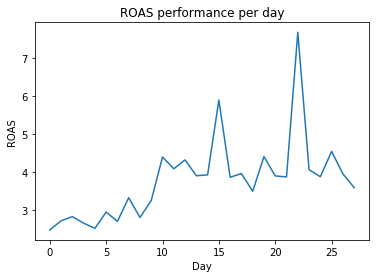

In [116]:
num_days = len(facebook_site_data['Date'].unique())
roas = facebook_site_data.groupby('Date')['Total Revenue'].sum()/facebook_site_data.groupby('Date')['Media Spend'].sum()
roas_daily = []
for date in facebook_site_data['Date'].unique():
    roas_daily.append(roas[date])
plt.plot(range(num_days), roas_daily)
plt.title("ROAS performance per day")
plt.xlabel('Day')
plt.ylabel('ROAS')
plt.show()

**Question 7**

Create a chart that shows CPC and CTR performance by Audience

A: See Chart Below.

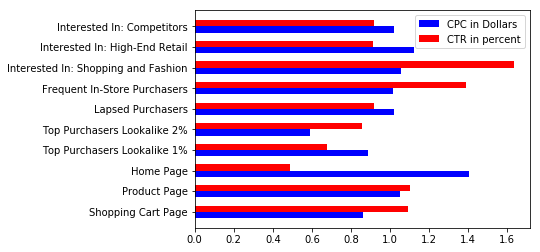

In [164]:
CPC = facebook_site_data.groupby('Audience')['CPC      '].mean()
CTR = facebook_site_data.groupby('Audience')['CTR      '].mean()*100
audiences = list(facebook_site_data['Audience'].unique())
width=0.3
inds = np.arange(len(audiences))
cpc = plt.barh(inds, list(CPC), width, color='blue')
ctr = plt.barh(inds+width, list(CTR), width, color='red')
plt.yticks(inds + width/2, audiences)
plt.legend([cpc, ctr], ['CPC in Dollars', 'CTR in percent'])
plt.show()

** Question 8**

Does amount of Daily Spend correlate to ROAS generated? Using a scatterplot and trendline, show the correlation between the two - is there a strong correlation? Explain why or why not.

A: Chart will be below. There is not trend between the Daily Spend and the ROAS generated. The scatter plot has a few groups of ponts but shows no overall trends. There seems to be a downward trend at the bottom left portion of the plot but unless the other points can be proven to be outliers we can only say there is no correlation.

In [174]:
daily_spend = []
spend = facebook_site_data.groupby('Date')['Media Spend'].sum()
for date in facebook_site_data['Date'].unique():
        daily_spend.append(spend[date])

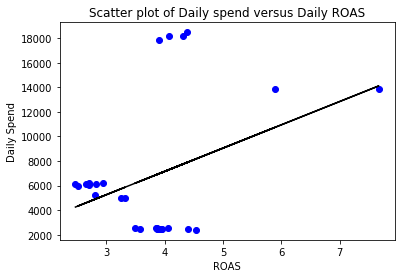

In [198]:
plt.scatter(roas_daily, daily_spend, color='Blue', marker='o')
z = np.polyfit(roas_daily, daily_spend, 1)
trendline = np.poly1d(z)
plt.plot(roas_daily, trendline(roas_daily), color='black')
plt.title('Scatter plot of Daily spend versus Daily ROAS')
plt.xlabel('ROAS')
plt.ylabel('Daily Spend')
plt.show()

**Question 9**

Which Metric in the chart from question 3 would you use to determine which creative performed best and why? Which creative performed best by this metric.

A: I've remade the chart from question 3 below for reference. The Best metric from this chart is the CPC, this is because CPC is inherently robust against the main factors which signify a bad ad campaign. Two easy examples of bad ad campaigns are a great ad with low reach and a poor ad with great reach. In the first case we would see a great click through rate but high CPM since there was not a lot of impressions and CPC will be high because it is a poor campaign. In the second case the CTR will be very poor but the CPM will be low. A low CPM might make you think that the ad performed well but it didn't get many clicks and so CPC will also be high in this case. Thus CPC being robust is the best choice. I did not consider Media Spend because judging the success of an ad campaign based on how much you spent on it is ridiculous. 

Now that we have determined that the best metric is CPC we see that the lowest CPC value and thus the highest click efficieny add was the **Brand Logo + Valentine's Day CTA**. 


Media | Spend | CPM | CTR |	CPC
---|---|---|---				
Brand Logo + Free Shipping CTA | 9349.39 | 13.143214 | 0.013068 | 1.023929
Brand Logo + Generic CTA | 54924.38 | 8.849893 | 0.009094 | 1.028627
Brand Logo + Save Now CTA | 58319.63 | 8.890589 | 0.009951 | 0.949216
Brand Logo + Valentine's Day Messaging CTA | 23331.03 | 9.296656 | 0.012357 | 0.819437
Free Shipping + Free Shipping CTA | 13401.07 | 13.140893 | 0.013248 | 1.012679
Valentine's Day + Generic CTA | 27204.47 | 9.445762 | 0.011470 | 0.893232
Valentine's Day + Valentine's Day CTA | 1836.90 | 16.120833 | 0.019791 | 0.869167


**Question 10**

What other factors would you consider (outside of question 9's metric) in analysing the most effective creative tactic? How could you control for this moving forward?

A:
Apart from the CPC metric I would also be interested in Cost Per Video Completion and ROAS as ways to analyze the most effective creative tactic. This is because Cost Per Video Completion would let you evaluate how effectively the ad campaign is engaging the consumer, this factor does not fall for the pitfall of CTR because if the add is not viewed enough then even if the engagement is high the Cost will still be high. However if many people are clicking through the the end this data will be skewed. Another factor I would want to include is ROAS. this is because like Cost per Video Completion and Cost per Click it takes into account both the cost and the return of the ad campaign. ROAS is a factor that is robust to high reach because it accounts for the amount of money being spent. It also does not fall into the pit trap of a high engagement low reach because the total revenue will be low in that model. To help control for these effective performance indicators we would want to make sure that future ads are judged off not only their costs but also their engagement. The last factor that I would be interested in looking at to determing the effectiveness is comment-to-like ratio or possibly comment-to-share ratio. These ideas continue with the idea that engagement should be maximized but reach should not suffer. A comment-to-like(or share) ratio gives us an engagement factor (comment) as well as a reach factor(likes/shares). One issue with this factor is that there is no good threshold. Low engagement high reach produces a small value while high engagement low reach moves you towards 1. 

I see two main strategies moving forward. The first is essentiall A/B testing, running multiple low engagement ads to find the most effective creative before pushing to large scale. The second would be to run all ad campaigns at a large scale to avoid any analysis issues that arise from weighting engagement per view too heavily. 


**Question 11**

What would you have done to optimize this campaign?

A: There are a lot of factors to consider when optimizine this campaign. You have to understand how each variable change affects the factors which represent effective performance. I will minimize CPC as a metric for optimizing this campaign though if more time permits more factors should be used and potentially algorithms implemented to determine which combination of factors predicts success the best.

Below I have compared different variables by there effect on the mean CPC of the campaign. Since we are minimizing CPC only for simplicity we will choose the minimums for CPC to base our campaign strategies around. 

Variable | Optimization
---|---
Gender | Choosing M/F while not the minimum is the best choice since we do not limit the reach of the ad and see a minimal increase in CPC
Audience | The highest value group when minimizing for CPC are those Interested in: Shopping and Fashion this should be the main target audience, but we have seen success with the lookalikes which may be relevant for if multiple campaigns are run.
Post Type | The clear choice here is photo. It provides a significant decrease in CPC
Excluded Audience | Excluding all users who visit the businesses website because they are already likely customers and are less likely to click and ad for a brand they use/buy from.
Creative | the best pick here is Brand Logo + Valentines day. Not only does this minimize our CPC it also promotes the brand which is a good move in the long run. 

Even though this ad campaign may do well for CPC optimizing a campaign or anything solely on one trait leaves it open to a lot of vulerabilities. It is simply possible that in the case of Photos vs. Video that a Photo is cheaper to produce and thus lowers CPC without providing benefit to the add campaign. A simple sanity check shows us that videos out perform photos in both engagement(Comments and clicks) and Reach(Likes, shares, impressions).

Impressions | Likes | Shares | Clicks | Comments
---|---|---|---|---				
Photo | 7803072 | 7742 | 2211 | 99297 | 4094
Video | 12436907 | 12416 | 3920 | 115051 | 6167

Further work must be done to optimize this campaign fully, but optimizing based on CPC is a start. Future optimizations would want to include balancing factors mentioned in question 10 such as Cost Per Video Completion now that we see Video is infact better than Photo and ROAS to make sure that monetary returns are being accounted for. 

In [204]:
facebook_site_data.groupby('Gender')['CPC      '].mean()

Gender
F      1.026768
M      0.919562
M/F    0.932112
Name: CPC      , dtype: float64

In [203]:
facebook_site_data.groupby('Audience')['CPC      '].mean()

Audience
Frequent In-Store Purchasers           0.860042
Home Page                              1.052521
Interested In: Competitors             1.402719
Interested In: High-End Retail         0.887544
Interested In: Shopping and Fashion    0.590601
Lapsed Purchasers                      1.021674
Product Page                           1.015975
Shopping Cart Page                     1.058591
Top Purchasers Lookalike 1%            1.122394
Top Purchasers Lookalike 2%            1.019809
Name: CPC      , dtype: float64

In [206]:
facebook_site_data.groupby('Post Type')['CPC      '].mean()

Post Type
Photo    0.870871
Video    1.073532
Name: CPC      , dtype: float64

In [207]:
facebook_site_data.groupby('Excluded Audience')['CPC      '].mean()

Excluded Audience
All Site Visitors                          0.940022
Product Page, Shopping Cart, Purchasers    1.047888
Purchasers, Shopping Cart                  1.011185
Purchases                                  1.054375
Name: CPC      , dtype: float64

In [208]:
facebook_site_data.groupby('Creative')['CPC      '].mean()

Creative
Brand Logo + Free Shipping CTA                1.023929
Brand Logo + Generic CTA                      1.028627
Brand Logo + Save Now CTA                     0.949216
Brand Logo + Valentine's Day Messaging CTA    0.819437
Free Shipping + Free Shipping CTA             1.012679
Valentine's Day + Generic CTA                 0.893232
Valentine's Day + Valentine's Day CTA         0.869167
Name: CPC      , dtype: float64

In [224]:
#Sanity Check
facebook_site_data.groupby('Post Type')['Impressions','Likes', 'Shares', 'Clicks','Comments'].sum()

,Impressions,Likes,Shares,Clicks,Comments
Post Type,,,,,
Photo,7803072,7742,2211,99297,4094
Video,12436907,12416,3920,115051,6167


**Question 12**

What variables were not tested in these campaigns that would have interested you? Why?

A:
Some variables that I would find interesting that were not tested in these campaigns are colors and video length. There has been a lot of research showing that certain colors help evoke different emotions. Potentially a change of colors could affect the click through rate of the ad. Obviously a photo cannot have a longer view time but seeing how an audience reacts to different lengths of videos is very important. Its possible that some audiences would prefer a short video and others may prefer a long video. While it may seem counter intuitive I have seen several cases where a longer video not only improved the viewership of a video but its engagement as well both in watch time and comments. 

In [199]:
facebook_site_data.to_excel(writer, "Facebook + Site Data")
writer.save()